# Exploratory Data Analysis

Import the Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib, pandas and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns
from pandas.plotting import scatter_matrix

from IPython.core.pylabtools import figsize

# Read and Explore the data

In [2]:
dataset = pd.read_excel(r'C:\Users\Trisa.Biswas\Desktop\Residential-Building-Data-Set.xlsx',header=[1])
dfdes = pd.read_excel(r'C:\Users\Trisa.Biswas\Desktop\Residential-Building-Data-Set.xlsx',sheet_name='Descriptions')

In [3]:
dataset.head(5)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [4]:
dfdes.head(2)

,Variable Group,Variable ID,Descriptions,Unit,Time Lag Number p,Variable name
0,PROJECT PHYSICAL AND FINANCIAL VARIABLES,V-1,Project locality defined in terms of zip codes,NaN,NaN,Zip Code
1,NaN,V-2,Total floor area of the building,m2,NaN,Floor Area


In [5]:
df = dfdes.iloc[:-1,[1,5]]
print(df)

   Variable ID                      Variable name
0            V-1                         Zip Code
1            V-2                       Floor Area
2            V-3                         Lot Area
3            V-4              Total Prelim est CC
4            V-5                    Prelim est CC
5            V-6         Equivalent Prelim est CC
6            V-7                         Duration
7            V-8                    Price of unit
8            V-9                        Actual SP
9           V-10                        Actual CC
10          V-11                   No. of permits
11          V-12                              BSI
12          V-13                              WPI
13          V-14    Total Floor Area of permitted
14          V-15             Cumulative Liquidity
15          V-16                             PSI 
16          V-17                 Land Price Index
17          V-18                     No. of loans
18          V-19                      Loan Amount


In [6]:
dataset.shape

(372, 109)

Create new category for ZipCode

In [7]:
def f(c):
  if c['V-1'] >= 1.0 and c['V-1'] <= 5.0:
    return '1-5'
  if c['V-1'] > 5.0 and c['V-1'] <= 10.0:
    return '6-10'
  if c['V-1'] > 10.0 and c['V-1'] <= 15.0:
    return '11-15'
  else:
    return '16-20'

In [8]:
dataset['Zip Code'] = dataset.apply(f, axis=1)

In [9]:
dataset = dataset.drop(['V-1'], axis = 1)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dataset.isnull().sum())

START YEAR            0
START QUARTER         0
COMPLETION YEAR       0
COMPLETION QUARTER    0
V-2                   0
V-3                   0
V-4                   0
V-5                   0
V-6                   0
V-7                   0
V-8                   0
V-11                  0
V-12                  0
V-13                  0
V-14                  0
V-15                  0
V-16                  0
V-17                  0
V-18                  0
V-19                  0
V-20                  0
V-21                  0
V-22                  0
V-23                  0
V-24                  0
V-25                  0
V-26                  0
V-27                  0
V-28                  0
V-29                  0
V-11.1                0
V-12.1                0
V-13.1                0
V-14.1                0
V-15.1                0
V-16.1                0
V-17.1                0
V-18.1                0
V-19.1                0
V-20.1                0
V-21.1                0
V-22.1          

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dataset.dtypes)

START YEAR              int64
START QUARTER           int64
COMPLETION YEAR         int64
COMPLETION QUARTER      int64
V-2                   float64
V-3                   float64
V-4                   float64
V-5                     int64
V-6                   float64
V-7                     int64
V-8                     int64
V-11                  float64
V-12                  float64
V-13                  float64
V-14                  float64
V-15                  float64
V-16                  float64
V-17                  float64
V-18                  float64
V-19                  float64
V-20                    int64
V-21                  float64
V-22                  float64
V-23                  float64
V-24                  float64
V-25                  float64
V-26                  float64
V-27                  float64
V-28                  float64
V-29                  float64
V-11.1                float64
V-12.1                float64
V-13.1                float64
V-14.1    

In [12]:
#remove whitespace from beginning and end of string
dataset = dataset.rename(columns=lambda x: x.strip())

# Changing data types of the variables

In [13]:
for col in ['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER','Zip Code']:
    dataset[col] = dataset[col].astype('category')

In [14]:
for col in dataset.iloc[:,4:108]:
    dataset[col] = dataset[col].astype('float')

In [15]:
dataset.iloc[:,5:] = dataset.iloc[:,4:].round(2)

# 5 number Summary for Numerical columns

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dataset.iloc[:,4:108].describe())

                V-2          V-3          V-4         V-5          V-6  \
count    372.000000   372.000000   372.000000  372.000000   372.000000   
mean    1729.044355   426.114247   327.904086  163.118280   554.419839   
std     1802.371491   490.076498   563.544337  112.604343   275.105953   
min      200.000000    60.000000     3.700000   10.000000   193.080000   
25%      720.000000   190.000000    67.800000   80.000000   391.677500   
50%     1220.000000   300.000000   164.700000  140.000000   522.455000   
75%     2100.000000   490.500000   366.050000  230.000000   667.905000   
max    15670.000000  5000.000000  7208.200000  640.000000  3436.930000   

              V-7          V-8         V-11        V-12        V-13  \
count  372.000000   372.000000   372.000000  372.000000  372.000000   
mean     6.266129  1088.118280  4210.998091   94.427957   88.050484   
std      2.096495   995.826172  1776.645135   62.891433   49.364302   
min      2.000000    40.000000  1562.000000   12.

# Count Values in Categorical Columns

In [17]:
dataset['START YEAR'].value_counts()

86    41
84    35
83    33
85    32
87    32
80    31
81    27
79    21
82    20
76    18
75    18
78    17
77    17
74    10
73     8
88     6
72     6
Name: START YEAR, dtype: int64

In [18]:
dataset['COMPLETION YEAR'].value_counts()

88    48
85    44
87    39
82    33
78    28
86    27
80    23
81    22
83    22
84    19
76    15
77    12
75    10
79     9
90     6
89     5
74     5
73     5
Name: COMPLETION YEAR, dtype: int64

In [19]:
dataset['START QUARTER'].value_counts()

1    129
2    103
3     80
4     60
Name: START QUARTER, dtype: int64

In [20]:
dataset['COMPLETION QUARTER'].value_counts()

4    106
2     94
3     89
1     83
Name: COMPLETION QUARTER, dtype: int64

In [21]:
dataset['Zip Code'].value_counts()

1-5      138
16-20    101
6-10      72
11-15     61
Name: Zip Code, dtype: int64

# Co-relations between all Variables


In [22]:
for col in dataset.columns:
    if dataset[col].dtype == 'float':
        print('\nColumn Name:', col,)
        print(dataset.corr()[col].sort_values())


Column Name: V-2
V-14.3   -0.023372
V-20.4   -0.022992
V-11.3   -0.020884
V-11.2   -0.019337
V-11.4   -0.017714
V-20.1   -0.017473
V-14.4   -0.016744
V-20     -0.016281
V-11.1   -0.009224
V-20.3   -0.007332
V-20.2   -0.003096
V-11      0.000398
V-18.2    0.002298
V-28.3    0.005463
V-28.2    0.006329
V-14.2    0.006428
V-18.1    0.010444
V-28.1    0.012165
V-14.1    0.018733
V-18.3    0.030849
V-14      0.031156
V-19.2    0.047046
V-18.4    0.047182
V-19.1    0.048560
V-18      0.051928
V-28      0.056016
V-28.4    0.056163
V-19.4    0.064766
V-24.2    0.066750
V-16.2    0.066877
            ...   
V-25      0.093655
V-26      0.093982
V-26.4    0.093984
V-12.3    0.094049
V-26.3    0.094131
V-12.2    0.094135
V-29.1    0.094137
V-12.1    0.094477
V-12.4    0.095118
V-27.4    0.095265
V-29      0.096251
V-27.3    0.096389
V-13.2    0.096425
V-22.3    0.096615
V-17.4    0.097016
V-22.2    0.098656
V-17.2    0.099119
V-21.3    0.099218
V-13.1    0.100181
V-16.4    0.101956
V-22.4    0.1

V-20.1   -0.581921
V-20.2   -0.554667
V-20     -0.545203
V-20.3   -0.487791
V-6      -0.156207
V-20.4   -0.141265
V-28.2   -0.086253
V-28.3   -0.010078
V-7       0.035894
V-3       0.074960
V-2       0.083806
V-28.1    0.114890
V-18.2    0.179203
V-11.4    0.187243
V-18.3    0.198700
V-14.4    0.200571
V-14.3    0.252121
V-11.2    0.285170
V-4       0.285302
V-11.1    0.288392
V-14.1    0.322191
V-11      0.340535
V-11.3    0.353806
V-18.1    0.356495
V-14      0.413254
V-14.2    0.464549
V-8       0.507481
V-9       0.515041
V-19.3    0.544985
V-27      0.548848
            ...   
V-26.1    0.774428
V-25.4    0.774799
V-22.4    0.776149
V-12.4    0.777743
V-22.1    0.778218
V-29.1    0.778643
V-21.2    0.778997
V-21      0.779430
V-12      0.779496
V-29.4    0.780310
V-21.1    0.780956
V-22.3    0.781769
V-12.2    0.783620
V-16.1    0.785000
V-26      0.785584
V-26.4    0.786178
V-12.1    0.786241
V-21.4    0.788958
V-15.3    0.793548
V-29.2    0.794085
V-15.1    0.796037
V-18      0.

V-20     -0.704711
V-20.1   -0.650396
V-20.2   -0.606984
V-20.3   -0.553642
V-20.4   -0.392048
V-6      -0.183555
V-7       0.033641
V-3       0.096138
V-2       0.100181
V-28.3    0.183171
V-28.2    0.189474
V-28.1    0.234000
V-28      0.300627
V-28.4    0.303027
V-4       0.348452
V-11      0.356266
V-11.4    0.386731
V-11.2    0.387081
V-14.4    0.388811
V-11.1    0.400524
V-11.3    0.430211
V-18.2    0.470689
V-18.3    0.472049
V-18.1    0.480316
V-14.3    0.480449
V-14      0.485246
V-14.1    0.488329
V-18      0.491855
V-14.2    0.534907
V-18.4    0.543484
            ...   
V-15.4    0.978667
V-29.3    0.978860
V-22.1    0.979137
V-22.3    0.979725
V-22.4    0.980036
V-13.4    0.981283
V-21.2    0.982046
V-25.4    0.982452
V-22.2    0.982786
V-29.2    0.983143
V-21      0.984495
V-26.4    0.984907
V-25.3    0.985458
V-21.1    0.986069
V-26.3    0.986796
V-12.4    0.987429
V-13.3    0.987974
V-12      0.988396
V-12.3    0.988643
V-26.2    0.989065
V-25.2    0.989242
V-12.2    0.

V-20.1   -0.481718
V-20     -0.478581
V-20.2   -0.434273
V-20.3   -0.350835
V-20.4   -0.161240
V-6      -0.093060
V-28.1   -0.034018
V-2      -0.019337
V-3       0.001283
V-7       0.022496
V-23.4    0.044648
V-4       0.050709
V-23.3    0.083051
V-27.3    0.094556
V-23.2    0.095234
V-27.2    0.097429
V-27.1    0.102959
V-27      0.109539
V-27.4    0.110133
V-28.3    0.113321
V-28.2    0.116941
V-18.1    0.120406
V-23.1    0.142937
V-28.4    0.174022
V-28      0.174699
V-23      0.178197
V-18.2    0.220381
V-9       0.225265
V-8       0.231458
V-10      0.235979
            ...   
V-12      0.377184
V-22.1    0.379418
V-21.4    0.379499
V-15.4    0.380007
V-15.2    0.382950
V-15.3    0.384913
V-16.3    0.385500
V-13.1    0.387081
V-24.2    0.391270
V-19.3    0.393594
V-17.2    0.400314
V-13      0.400494
V-16.2    0.420071
V-19.4    0.422786
V-24.3    0.429157
V-17.1    0.430296
V-17      0.452113
V-24.4    0.459553
V-16.1    0.488605
V-16      0.530470
V-14.4    0.689632
V-11.4    0.

V-20     -0.358401
V-20.1   -0.294629
V-20.2   -0.253004
V-20.3   -0.213901
V-6      -0.143196
V-20.4   -0.105261
V-3       0.057035
V-2       0.088269
V-11.2    0.097429
V-7       0.102099
V-11      0.116742
V-11.4    0.123877
V-11.1    0.126699
V-28.3    0.130746
V-11.3    0.133313
V-28.2    0.154596
V-14.4    0.159050
V-14.3    0.198582
V-14.1    0.203956
V-14      0.215598
V-14.2    0.229156
V-28.1    0.260632
V-28      0.283473
V-28.4    0.286564
V-4       0.312088
V-18.3    0.322312
V-18.2    0.340704
V-18      0.389125
V-18.1    0.389969
V-18.4    0.469539
            ...   
V-17.4    0.785697
V-12.2    0.786655
V-21      0.788333
V-12.3    0.789389
V-12.4    0.790820
V-13      0.806722
V-13.1    0.816698
V-13.2    0.819208
V-13.4    0.821677
V-13.3    0.823995
V-26      0.837589
V-25      0.840160
V-26.1    0.842677
V-25.1    0.843688
V-26.2    0.848618
V-25.2    0.849398
V-25.4    0.850502
V-25.3    0.851974
V-26.3    0.852317
V-26.4    0.852552
V-23      0.896300
V-23.1    0.

V-20     -0.738580
V-20.1   -0.689839
V-20.2   -0.649182
V-20.3   -0.601545
V-20.4   -0.431059
V-6      -0.176583
V-7       0.014524
V-3       0.089437
V-2       0.096615
V-28.3    0.165303
V-28.2    0.183312
V-28.1    0.225415
V-28      0.293254
V-28.4    0.295612
V-11      0.332376
V-11.2    0.348150
V-4       0.351855
V-11.4    0.362141
V-14.4    0.370280
V-11.1    0.377706
V-11.3    0.402272
V-18.3    0.427976
V-18.2    0.439475
V-14.1    0.448985
V-14      0.459393
V-14.3    0.460269
V-18.1    0.462772
V-18      0.479801
V-18.4    0.510588
V-14.2    0.516102
            ...   
V-17.2    0.974726
V-13      0.975515
V-17.3    0.976828
V-13.4    0.976910
V-26.1    0.977517
V-29.4    0.977693
V-26      0.978566
V-15      0.979353
V-15.1    0.979495
V-13.3    0.979598
V-13.1    0.979725
V-13.2    0.980600
V-15.2    0.982401
V-21.4    0.983374
V-15.3    0.983936
V-21.2    0.985347
V-22.4    0.985805
V-22      0.986068
V-21      0.986641
V-15.4    0.986707
V-22.1    0.988197
V-21.1    0.

V-20     -0.682081
V-20.1   -0.656953
V-20.2   -0.635909
V-20.3   -0.597876
V-20.4   -0.477884
V-6      -0.170872
V-7       0.032028
V-3       0.088246
V-2       0.097016
V-28.3    0.171121
V-28.2    0.185079
V-28.1    0.240854
V-11      0.258381
V-28      0.270710
V-28.4    0.273477
V-11.1    0.318483
V-11.2    0.323907
V-4       0.352633
V-11.4    0.392836
V-11.3    0.395398
V-14      0.407897
V-18.3    0.420118
V-14.4    0.422388
V-18.2    0.422998
V-14.1    0.430746
V-18      0.432534
V-18.1    0.444346
V-14.3    0.482141
V-18.4    0.493651
V-14.2    0.495981
            ...   
V-21.3    0.964810
V-25.2    0.964905
V-21.4    0.965996
V-25.1    0.966529
V-25      0.967190
V-26.3    0.967643
V-21.2    0.968038
V-21      0.968502
V-22      0.968635
V-13.1    0.968712
V-21.1    0.969652
V-26.2    0.970592
V-22.1    0.970720
V-17.1    0.971008
V-26.1    0.972167
V-26      0.972265
V-12      0.972460
V-13.2    0.972827
V-13.4    0.974276
V-22.3    0.974697
V-13.3    0.976254
V-22.2    0.

Name: V-9, Length: 104, dtype: float64

Column Name: V-10
V-20     -0.521631
V-20.1   -0.484619
V-20.2   -0.437794
V-20.3   -0.384886
V-20.4   -0.267729
V-28.3    0.041004
V-28.2    0.126206
V-3       0.165161
V-11.2    0.235979
V-2       0.253317
V-11.4    0.264959
V-28.1    0.265826
V-14.4    0.272395
V-11      0.272989
V-11.1    0.274565
V-18.3    0.278294
V-28      0.278311
V-28.4    0.280362
V-11.3    0.280513
V-7       0.281069
V-6       0.308446
V-14.1    0.324123
V-14.3    0.326127
V-18.2    0.336466
V-14.2    0.349538
V-14      0.370771
V-18      0.410715
V-18.1    0.423000
V-18.4    0.444283
V-19.3    0.566040
            ...   
V-15      0.763412
V-22.4    0.763800
V-12      0.764223
V-21.1    0.765349
V-13.1    0.766181
V-29.4    0.766440
V-22.3    0.766655
V-12.1    0.767068
V-21.2    0.768019
V-12.4    0.769118
V-12.2    0.769570
V-12.3    0.770407
V-13.4    0.771490
V-21.3    0.771751
V-25.1    0.775280
V-25      0.775823
V-13.2    0.776508
V-25.2    0.776686
V-26      0

After carefully observing the values, we drop V3,V14,V11,V20,V29,V28,V18,V19

# Co-Relations of Variables in different Time Lags

In [23]:
#No. of Permits
df1 = dataset[['V-11','V-11.1','V-11.2','V-11.3','V-11.4']]
print(df1.corr())

            V-11    V-11.1    V-11.2    V-11.3    V-11.4
V-11    1.000000  0.869976  0.734302  0.562479  0.451892
V-11.1  0.869976  1.000000  0.827788  0.719920  0.548524
V-11.2  0.734302  0.827788  1.000000  0.814347  0.722685
V-11.3  0.562479  0.719920  0.814347  1.000000  0.842381
V-11.4  0.451892  0.548524  0.722685  0.842381  1.000000


In [24]:
#BSI
df2 = dataset[['V-12','V-12.1','V-12.2','V-12.3','V-12.4']]
print(df2.corr())

            V-12    V-12.1    V-12.2    V-12.3    V-12.4
V-12    1.000000  0.999034  0.997262  0.994722  0.992209
V-12.1  0.999034  1.000000  0.999220  0.997049  0.994840
V-12.2  0.997262  0.999220  1.000000  0.998901  0.997030
V-12.3  0.994722  0.997049  0.998901  1.000000  0.999221
V-12.4  0.992209  0.994840  0.997030  0.999221  1.000000


In [25]:
#WPI
df3 = dataset[['V-13','V-13.1','V-13.2','V-13.3','V-13.4']]
print(df3.corr())

            V-13    V-13.1    V-13.2    V-13.3    V-13.4
V-13    1.000000  0.993293  0.984834  0.979926  0.976982
V-13.1  0.993293  1.000000  0.995289  0.987974  0.981283
V-13.2  0.984834  0.995289  1.000000  0.995408  0.986681
V-13.3  0.979926  0.987974  0.995408  1.000000  0.995218
V-13.4  0.976982  0.981283  0.986681  0.995218  1.000000


In [26]:
#Total Floor area permitted
df4 = dataset[['V-14','V-14.1','V-14.2','V-14.3','V-14.4']]
print(df4.corr())

            V-14    V-14.1    V-14.2    V-14.3    V-14.4
V-14    1.000000  0.846100  0.764840  0.634789  0.462527
V-14.1  0.846100  1.000000  0.831252  0.774249  0.578107
V-14.2  0.764840  0.831252  1.000000  0.822091  0.691024
V-14.3  0.634789  0.774249  0.822091  1.000000  0.835221
V-14.4  0.462527  0.578107  0.691024  0.835221  1.000000


In [27]:
#Cumulative Liquidity
df5 = dataset[['V-15','V-15.1','V-15.2','V-15.3','V-15.4']]
print(df5.corr())

            V-15    V-15.1    V-15.2    V-15.3    V-15.4
V-15    1.000000  0.998564  0.998125  0.995986  0.995482
V-15.1  0.998564  1.000000  0.998841  0.998120  0.996126
V-15.2  0.998125  0.998841  1.000000  0.998873  0.998325
V-15.3  0.995986  0.998120  0.998873  1.000000  0.998836
V-15.4  0.995482  0.996126  0.998325  0.998836  1.000000


In [28]:
#Private sector investment in new buildings
df6 = dataset[['V-16','V-16.1','V-16.2','V-16.3','V-16.4']]
print(df6.corr())

            V-16    V-16.1    V-16.2    V-16.3    V-16.4
V-16    1.000000  0.936973  0.934736  0.898414  0.893069
V-16.1  0.936973  1.000000  0.922221  0.916231  0.874579
V-16.2  0.934736  0.922221  1.000000  0.928841  0.910760
V-16.3  0.898414  0.916231  0.928841  1.000000  0.927269
V-16.4  0.893069  0.874579  0.910760  0.927269  1.000000


In [29]:
#Land Price Index
df7 = dataset[['V-17','V-17.1','V-17.2','V-17.3','V-17.4']]
print(df7.corr())

            V-17    V-17.1    V-17.2    V-17.3    V-17.4
V-17    1.000000  0.989202  0.978005  0.964992  0.956799
V-17.1  0.989202  1.000000  0.992408  0.982502  0.971008
V-17.2  0.978005  0.992408  1.000000  0.992080  0.981755
V-17.3  0.964992  0.982502  0.992080  1.000000  0.990411
V-17.4  0.956799  0.971008  0.981755  0.990411  1.000000


In [30]:
#Loan Amount
df8 = dataset[['V-18','V-18.1','V-18.2','V-18.3','V-18.4']]
print(df8.corr())

            V-18    V-18.1    V-18.2    V-18.3    V-18.4
V-18    1.000000  0.249126 -0.019882 -0.005773  0.879016
V-18.1  0.249126  1.000000  0.315327 -0.012824  0.219414
V-18.2 -0.019882  0.315327  1.000000  0.399877 -0.002276
V-18.3 -0.005773 -0.012824  0.399877  1.000000  0.035492
V-18.4  0.879016  0.219414 -0.002276  0.035492  1.000000


In [31]:
#Amount of loans extended by banks in a specific time
df9 = dataset[['V-19','V-19.1','V-19.2','V-19.3','V-19.4']]
print(df9.corr())

            V-19    V-19.1    V-19.2    V-19.3    V-19.4
V-19    1.000000  0.692001  0.575809  0.544985  0.924284
V-19.1  0.692001  1.000000  0.746219  0.575390  0.673568
V-19.2  0.575809  0.746219  1.000000  0.732791  0.589035
V-19.3  0.544985  0.575390  0.732791  1.000000  0.584188
V-19.4  0.924284  0.673568  0.589035  0.584188  1.000000


In [32]:
#Interest Rate for Loans
df20 = dataset[['V-20','V-20.1','V-20.2','V-20.3','V-20.4']]
print(df20.corr())

            V-20    V-20.1    V-20.2    V-20.3    V-20.4
V-20    1.000000  0.895272  0.833355  0.782440  0.621120
V-20.1  0.895272  1.000000  0.930367  0.873793  0.696402
V-20.2  0.833355  0.930367  1.000000  0.938836  0.747980
V-20.3  0.782440  0.873793  0.938836  1.000000  0.800911
V-20.4  0.621120  0.696402  0.747980  0.800911  1.000000


In [33]:
#Avg Construction Cost of buildings by private sector at completion
df21 = dataset[['V-21','V-21.1','V-21.2','V-21.3','V-21.4']]
print(df21.corr())

            V-21    V-21.1    V-21.2    V-21.3    V-21.4
V-21    1.000000  0.988929  0.988389  0.986956  0.984369
V-21.1  0.988929  1.000000  0.985384  0.989082  0.988355
V-21.2  0.988389  0.985384  1.000000  0.980286  0.986897
V-21.3  0.986956  0.989082  0.980286  1.000000  0.981848
V-21.4  0.984369  0.988355  0.986897  0.981848  1.000000


In [34]:
#Avg Construction Cost of buildings by private sector at beginning
df22 = dataset[['V-22','V-22.1','V-22.2','V-22.3','V-22.4']]
print(df22.corr())

            V-22    V-22.1    V-22.2    V-22.3    V-22.4
V-22    1.000000  0.990740  0.990355  0.986068  0.978855
V-22.1  0.990740  1.000000  0.989792  0.988197  0.983209
V-22.2  0.990355  0.989792  1.000000  0.989956  0.988881
V-22.3  0.986068  0.988197  0.989956  1.000000  0.985805
V-22.4  0.978855  0.983209  0.988881  0.985805  1.000000


In [35]:
#Official exchange rate with respect to dollars
df23 = dataset[['V-23','V-23.1','V-23.2','V-23.3','V-23.4']]
print(df23.corr())

            V-23    V-23.1    V-23.2    V-23.3    V-23.4
V-23    1.000000  0.956980  0.935077  0.927942  0.910424
V-23.1  0.956980  1.000000  0.976356  0.968620  0.949807
V-23.2  0.935077  0.976356  1.000000  0.991920  0.972328
V-23.3  0.927942  0.968620  0.991920  1.000000  0.979923
V-23.4  0.910424  0.949807  0.972328  0.979923  1.000000


In [36]:
#Non-Official exchange rate
df24 = dataset[['V-24','V-24.1','V-24.2','V-24.3','V-24.4']]
print(df24.corr())

            V-24    V-24.1    V-24.2    V-24.3    V-24.4
V-24    1.000000  0.992834  0.980833  0.965668  0.954313
V-24.1  0.992834  1.000000  0.992207  0.980694  0.970754
V-24.2  0.980833  0.992207  1.000000  0.991450  0.983101
V-24.3  0.965668  0.980694  0.991450  1.000000  0.991267
V-24.4  0.954313  0.970754  0.983101  0.991267  1.000000


In [37]:
#Consumer Price Index in base year
df25 = dataset[['V-25','V-25.1','V-25.2','V-25.3','V-25.4']]
print(df25.corr())

            V-25    V-25.1    V-25.2    V-25.3    V-25.4
V-25    1.000000  0.998898  0.997556  0.996639  0.996371
V-25.1  0.998898  1.000000  0.999094  0.997877  0.997237
V-25.2  0.997556  0.999094  1.000000  0.999119  0.997942
V-25.3  0.996639  0.997877  0.999119  1.000000  0.998998
V-25.4  0.996371  0.997237  0.997942  0.998998  1.000000


In [38]:
#CPI of housing,water,fuel and power in base year
df26 = dataset[['V-26','V-26.1','V-26.2','V-26.3','V-26.4']]
print(df26.corr())

            V-26    V-26.1    V-26.2    V-26.3    V-26.4
V-26    1.000000  0.999101  0.997389  0.996390  0.996743
V-26.1  0.999101  1.000000  0.999016  0.997783  0.997691
V-26.2  0.997389  0.999016  1.000000  0.999362  0.998276
V-26.3  0.996390  0.997783  0.999362  1.000000  0.999075
V-26.4  0.996743  0.997691  0.998276  0.999075  1.000000


In [39]:
#Stock Market Index
df27 = dataset[['V-27','V-27.1','V-27.2','V-27.3','V-27.4']]
print(df27.corr())

            V-27    V-27.1    V-27.2    V-27.3    V-27.4
V-27    1.000000  0.984760  0.963339  0.934709  0.896495
V-27.1  0.984760  1.000000  0.986118  0.961482  0.928462
V-27.2  0.963339  0.986118  1.000000  0.984106  0.959803
V-27.3  0.934709  0.961482  0.984106  1.000000  0.986036
V-27.4  0.896495  0.928462  0.959803  0.986036  1.000000


In [40]:
#Population of the city
df28 = dataset[['V-28','V-28.1','V-28.2','V-28.3','V-28.4']]
print(df28.corr())

            V-28    V-28.1    V-28.2    V-28.3    V-28.4
V-28    1.000000 -0.090253 -0.504251 -0.301403  0.999989
V-28.1 -0.090253  1.000000 -0.153658 -0.511389 -0.089478
V-28.2 -0.504251 -0.153658  1.000000  0.045088 -0.503130
V-28.3 -0.301403 -0.511389  0.045088  1.000000 -0.300429
V-28.4  0.999989 -0.089478 -0.503130 -0.300429  1.000000


In [41]:
#Gold price per ounce
df29 = dataset[['V-29','V-29.1','V-29.2','V-29.3','V-29.4']]
print(df29.corr())

            V-29    V-29.1    V-29.2    V-29.3    V-29.4
V-29    1.000000  0.987676  0.969881  0.965787  0.968660
V-29.1  0.987676  1.000000  0.989444  0.974863  0.972136
V-29.2  0.969881  0.989444  1.000000  0.990452  0.977315
V-29.3  0.965787  0.974863  0.990452  1.000000  0.990122
V-29.4  0.968660  0.972136  0.977315  0.990122  1.000000


Variables not co-related wrt time period are:<br>
V25 - Consumer price index (CPI) i in the base year a<br>
V19 - The amount of loans extended by banks in a time resolution e<br>
V18 - The number of loans extended by banks in a time resolution e<br>
V14 - Total floor areas of building permits issued by the city/municipality<br>
V11 - The number of building permits issued

After carefully observing the co-relations we conclude that: <br>
Dropped variables - V4,V5,V8,V12,V13,V25,V21,V22,V17,V16

In [42]:
dataset[['V-2','V-6','V-7','V-9','V-10','V-15','V-23','V-24']].corr()

,V-2,V-6,V-7,V-9,V-10,V-15,V-23,V-24
V-2,1.000000,0.211963,0.142538,0.254336,0.253317,0.082655,0.068995,0.076650
V-6,0.211963,1.000000,0.152789,0.192130,0.308446,-0.198823,-0.176713,-0.081085
V-7,0.142538,0.152789,1.000000,0.139202,0.281069,0.020217,0.062436,0.085245
V-9,0.254336,0.192130,0.139202,1.000000,0.796041,0.601155,0.533871,0.503244
V-10,0.253317,0.308446,0.281069,0.796041,1.000000,0.763412,0.676554,0.604706
V-15,0.082655,-0.198823,0.020217,0.601155,0.763412,1.000000,0.797959,0.681342
V-23,0.068995,-0.176713,0.062436,0.533871,0.676554,0.797959,1.000000,0.700560
V-24,0.076650,-0.081085,0.085245,0.503244,0.604706,0.681342,0.700560,1.000000


# Categorical Co-relations using One-Hot Encoding

In [43]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(dataset['Zip Code'])
# Drop column B as it is now encoded
dataset = dataset.drop('Zip Code',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)

In [44]:
#Avoiding dummy variable trap
dataset = dataset.iloc[:,:-1]

In [45]:
dataset.head(5)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-2,V-3,V-4,V-5,V-6,V-7,...,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10,1-5,11-15,16-20
0,81,1,85,1,3150.0,920.0,598.5,190.0,1010.84,16.0,...,60.74,54.26,2978.26,41407.0,601988.1,2200.0,410.0,1,0,0
1,84,1,89,4,7600.0,1140.0,3040.0,400.0,963.81,23.0,...,90.95,89.79,11379.37,44835.0,929027.1,5000.0,1000.0,1,0,0
2,78,1,81,4,4800.0,840.0,480.0,100.0,689.84,15.0,...,38.70,32.04,1653.06,37933.0,377828.6,1200.0,170.0,1,0,0
3,72,2,73,2,685.0,202.0,13.7,20.0,459.54,4.0,...,9.73,8.34,686.16,8194.0,122031.7,165.0,30.0,1,0,0
4,87,1,90,2,3000.0,800.0,1230.0,410.0,631.91,13.0,...,136.60,140.20,9821.00,48260.0,1734973.5,5500.0,700.0,1,0,0


In [46]:
# Correlations in one-hot encoded dataframe
dataset[['V-2','V-6','V-7','V-9','V-10','V-15','V-23','V-24','1-5','11-15','16-20']].corr()

,V-2,V-6,V-7,V-9,V-10,V-15,V-23,V-24,1-5,11-15,16-20
V-2,1.000000,0.211963,0.142538,0.254336,0.253317,0.082655,0.068995,0.076650,0.323957,-0.220515,-0.044809
V-6,0.211963,1.000000,0.152789,0.192130,0.308446,-0.198823,-0.176713,-0.081085,0.507892,-0.144566,-0.503367
V-7,0.142538,0.152789,1.000000,0.139202,0.281069,0.020217,0.062436,0.085245,-0.060404,0.009592,0.003236
V-9,0.254336,0.192130,0.139202,1.000000,0.796041,0.601155,0.533871,0.503244,0.401676,-0.205992,-0.238928
V-10,0.253317,0.308446,0.281069,0.796041,1.000000,0.763412,0.676554,0.604706,0.316589,-0.172625,-0.147657
V-15,0.082655,-0.198823,0.020217,0.601155,0.763412,1.000000,0.797959,0.681342,-0.005298,-0.118781,0.225858
V-23,0.068995,-0.176713,0.062436,0.533871,0.676554,0.797959,1.000000,0.700560,-0.046663,-0.083307,0.183275
V-24,0.076650,-0.081085,0.085245,0.503244,0.604706,0.681342,0.700560,1.000000,-0.052286,-0.055262,0.164343
1-5,0.323957,0.507892,-0.060404,0.401676,0.316589,-0.005298,-0.046663,-0.052286,1.000000,-0.340108,-0.468822
11-15,-0.220515,-0.144566,0.009592,-0.205992,-0.172625,-0.118781,-0.083307,-0.055262,-0.340108,1.000000,-0.270371


Scatter matrix of selected variables

In [47]:
newdf = dataset[['V-2','V-6','V-7','V-9','V-10','V-15','V-23','V-24','1-5','11-15','16-20']]

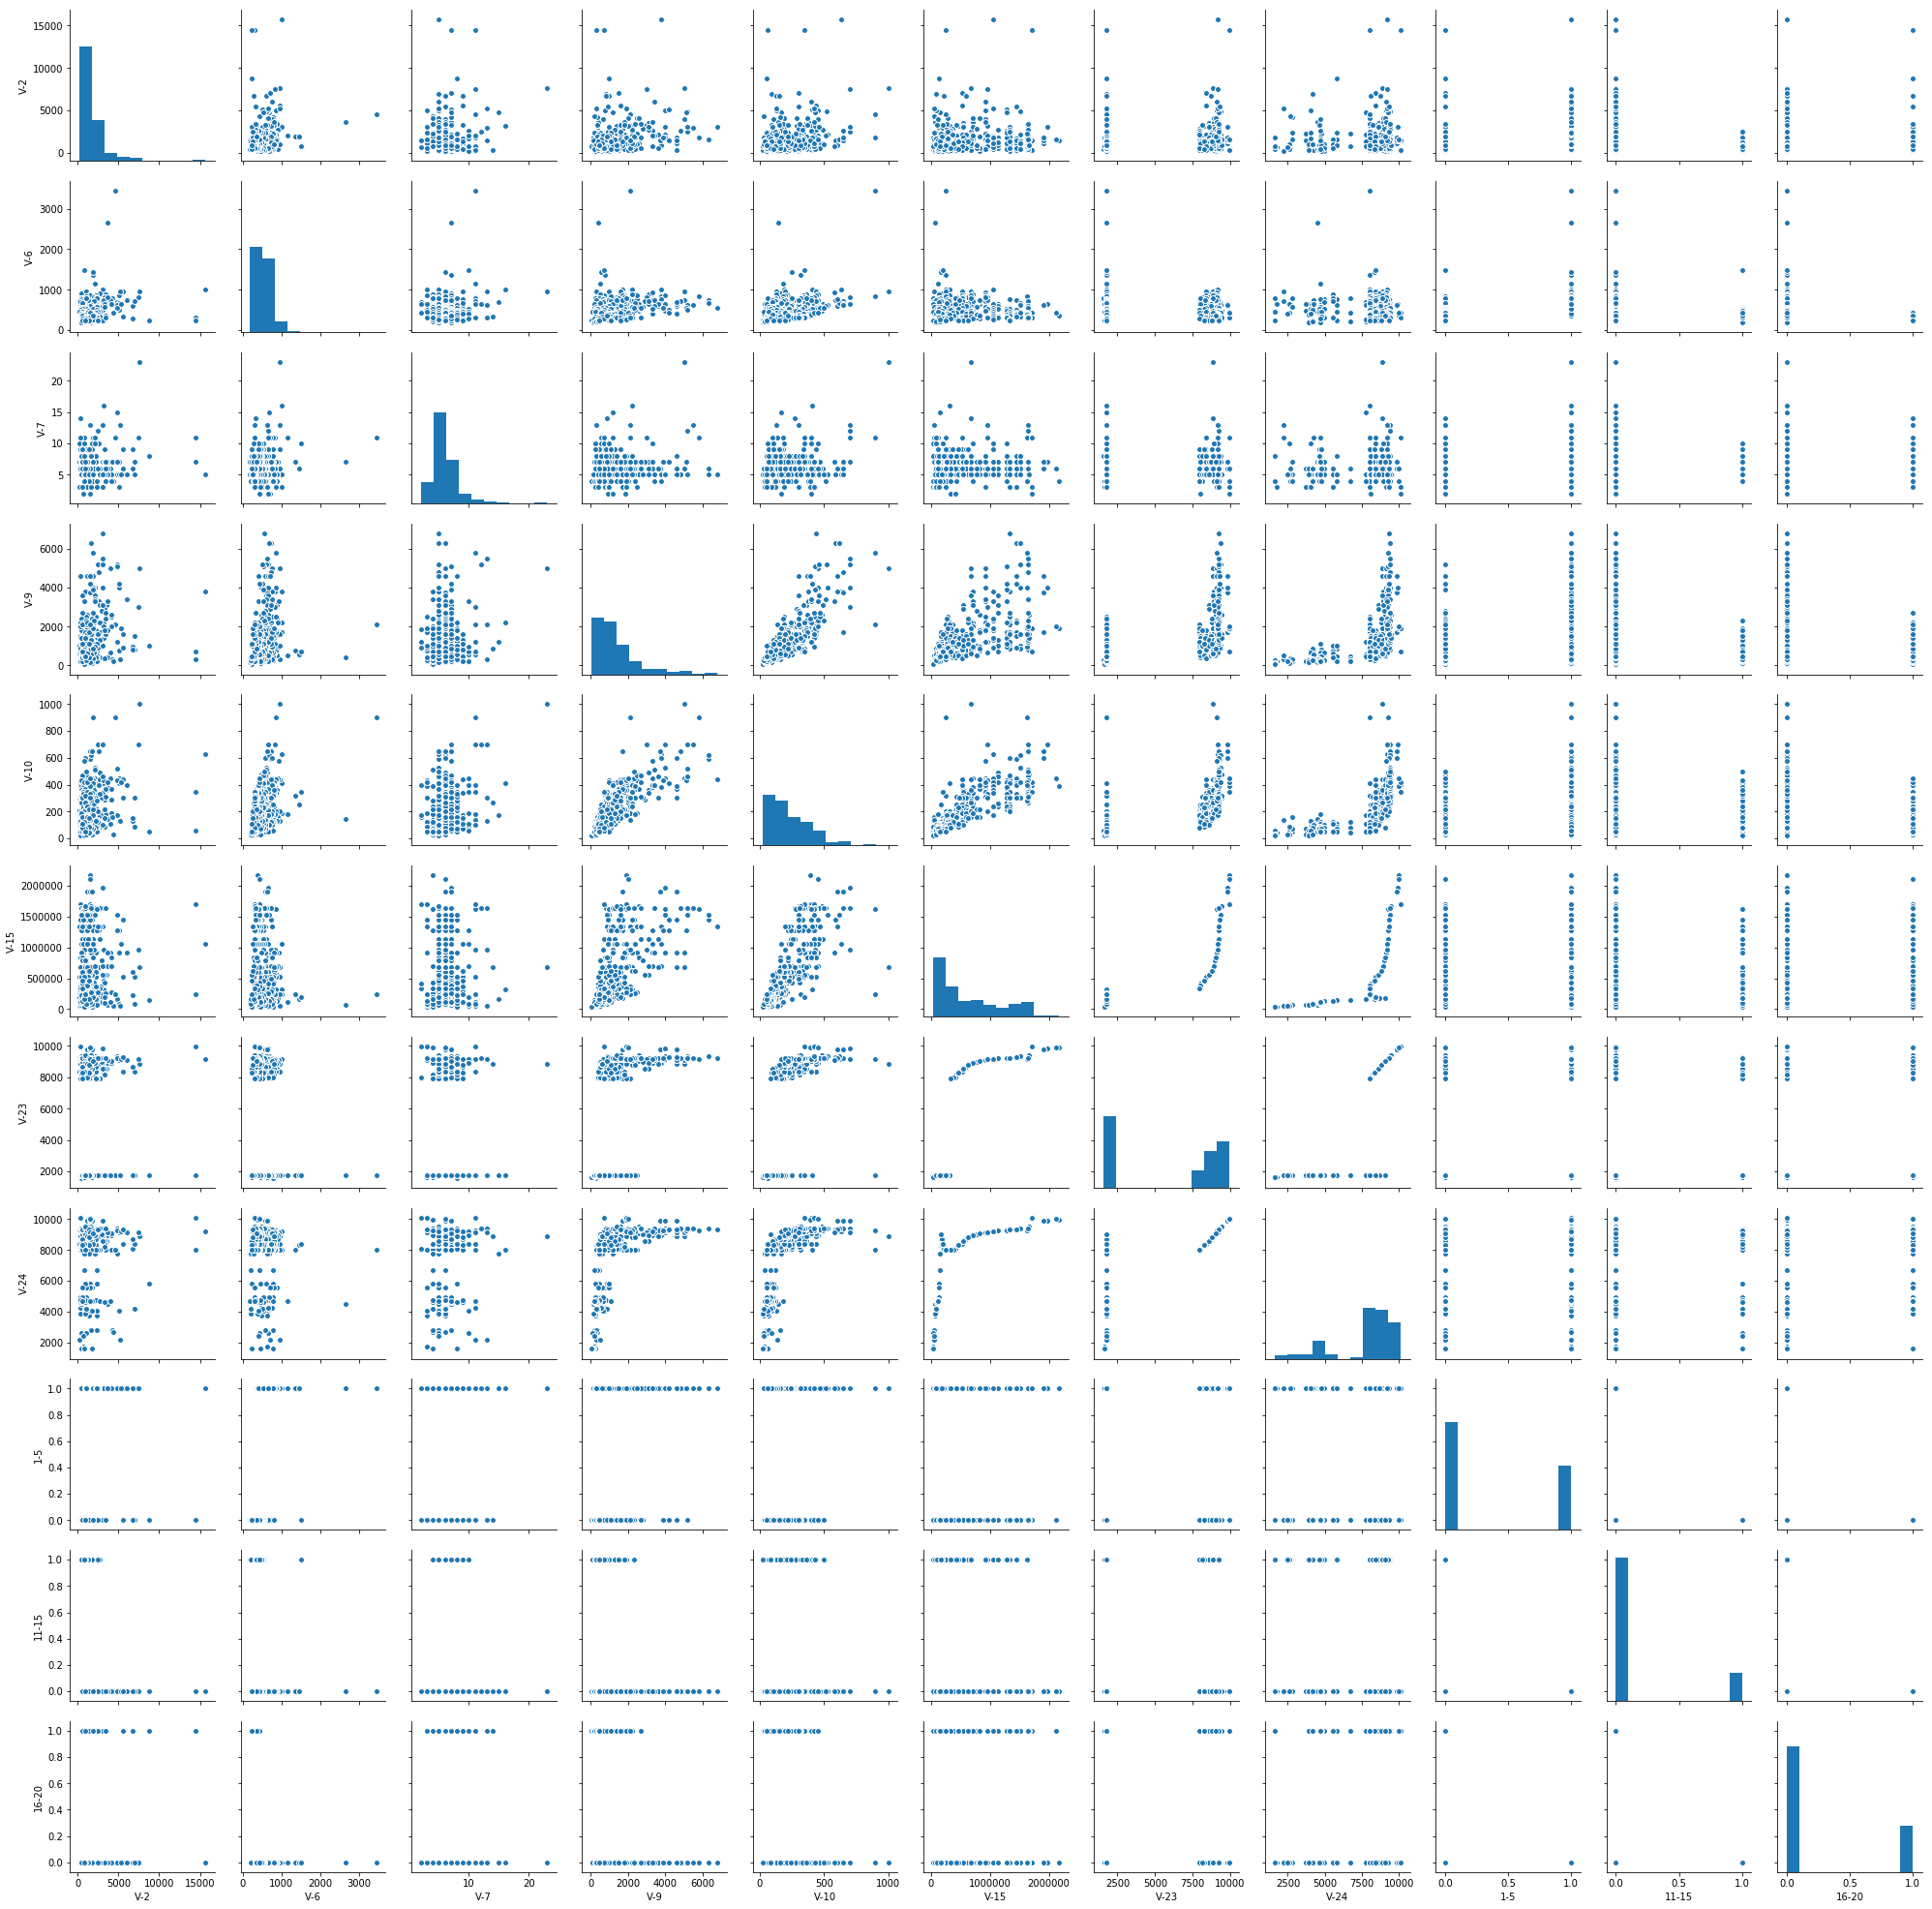

In [48]:
sns.pairplot(newdf)
plt.show()

# Model Preparation

In [49]:
#Split data into test and train (Prediciton of V-9)
X = newdf.iloc[:, newdf.columns != 'V-9'].values
y = newdf.iloc[:,3].values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 

#Predicting Test set results
y_pred = regressor.predict(X_test)

In [52]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

75.13871166761578 %


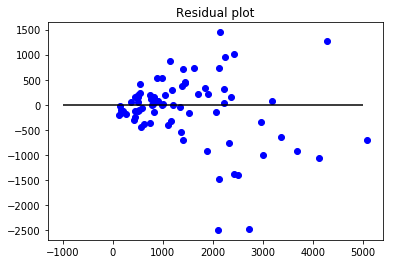

In [53]:
#Residual Plot
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')
plt.show()

Interpretation: The plot shows a fairly random pattern, indicating a good fit for a linear model

# Build optimal model using Backward Elimination

Add constant term to X

In [54]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((372,1)).astype(int), values=X, axis=1)

In [55]:
X.shape

(372, 11)

In [57]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     88.25
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           1.33e-90
Time:                        15:04:52   Log-Likelihood:                -2936.7
No. Observations:                 372   AIC:                             5895.
Df Residuals:                     361   BIC:                             5938.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        528.6096    233.408      2.265      0.0

Since the p-value of x6 is greater than 0.05 we drop it

In [60]:
X_opt = X[:,[0,1,2,3,4,6,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     97.88
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           2.33e-91
Time:                        15:07:02   Log-Likelihood:                -2937.3
No. Observations:                 372   AIC:                             5895.
Df Residuals:                     362   BIC:                             5934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.9574    226.655      2.065      0.0

Now we drop x5

In [61]:
X_opt = X[:,[0,1,2,3,4,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.21e-92
Time:                        15:07:52   Log-Likelihood:                -2937.7
No. Observations:                 372   AIC:                             5893.
Df Residuals:                     363   BIC:                             5929.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        437.0616    223.988      1.951      0.0

Now we drop x3

In [62]:
X_opt = X[:,[0,1,2,4,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           4.42e-93
Time:                        15:08:33   Log-Likelihood:                -2938.2
No. Observations:                 372   AIC:                             5892.
Df Residuals:                     364   BIC:                             5924.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.8967    197.404      1.691      0.0

Now we drop x1

In [63]:
X_opt = X[:,[0,2,4,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     146.3
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           6.87e-94
Time:                        15:09:18   Log-Likelihood:                -2938.9
No. Observations:                 372   AIC:                             5892.
Df Residuals:                     365   BIC:                             5919.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.3026    196.935      1.784      0.0

Now we drop the constant term and check if our model improves or not.

In [66]:
X_opt = X[:,[2,4,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     418.0
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          2.12e-160
Time:                        15:10:48   Log-Likelihood:                -2940.5
No. Observations:                 372   AIC:                             5893.
Df Residuals:                     366   BIC:                             5917.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8242      0.133     -6.177      0.0

The r-squared and adjusted r-squared improved after dropping the constant term. 

# Checking VIF Factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = regressor_OLS.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[5.802675447991925,
 5.473002305188212,
 12.84135381216649,
 2.9563269861909833,
 1.7284106518531996,
 2.5447067020126535]

Since VIF of 3rd variable is greater than 10, we have to remove it as it suggests that it is multi-collinear

In [68]:
X_opt = X[:,[2,4,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     451.1
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          2.84e-154
Time:                        15:13:38   Log-Likelihood:                -2958.0
No. Observations:                 372   AIC:                             5926.
Df Residuals:                     367   BIC:                             5946.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4235      0.121     -3.500      0.0

Remove x4 as p-value increases.

In [69]:
X_opt = X[:,[2,4,8,10]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     565.5
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          1.12e-155
Time:                        15:14:38   Log-Likelihood:                -2958.0
No. Observations:                 372   AIC:                             5924.
Df Residuals:                     368   BIC:                             5940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4250      0.113     -3.771      0.0

In [ ]:
remove x4.

In [71]:
X_opt = X[:,[2,4,8]]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     750.7
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          1.16e-156
Time:                        15:15:42   Log-Likelihood:                -2959.2
No. Observations:                 372   AIC:                             5924.
Df Residuals:                     369   BIC:                             5936.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4492      0.112     -4.021      0.0

check VIF again.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = regressor_OLS.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[3.7103508163487184, 3.0054235875599864, 2.1442519088172136]

# Predicting Values

In [73]:
y_pred = pd.DataFrame(regressor_OLS.predict(newdf[['V-6','V-10','1-5']]).round(2), columns=["Predicted"])

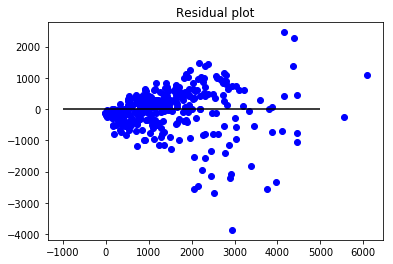

In [74]:
#Residual Plot
tdf = newdf[['V-9']]
x_plot = plt.scatter(y_pred, (y_pred['Predicted'] - tdf['V-9']), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')
plt.show()

# Interpreting Results

In [75]:
mean_expr = np.mean(newdf[['V-6','V-10','1-5']])
mean_expr

V-6     554.419839
V-10    232.647849
1-5       0.370968
dtype: float64

In [76]:
print('Parameters: ', np.around(regressor_OLS.params))
print('R2: ', regressor_OLS.rsquared.round(2))

Parameters:  [ -0.   6. 560.]
R2:  0.86


In [77]:
np.around(regressor_OLS.bse)

array([ 0.,  0., 86.])

In [78]:
np.around(regressor_OLS.conf_int())

array([[ -1.,  -0.],
       [  6.,   6.],
       [391., 730.]])

In [79]:
regressor_OLS.pvalues.round(4)

array([0.0001, 0.    , 0.    ])

In [80]:
#calculating mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(tdf,y_pred))
print(mean_squared_error(tdf,y_pred))
print(np.sqrt(mean_squared_error(tdf,y_pred)))
#mse = mean_squared_error(tdf,y_pred)
#print(mse)

472.0734946236559
475252.46861827956
689.3855732594639


For Prediction of Construction Cost, we can use the same process. Instead of V-9, our dependent variable becomes V-10. And we use V-9 as our independent variable in this case.

Conclusion : There is a negative co-relation between Sales Price of Residential Building Projects and Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year.<br>
There is a positive relation of Sales Price with Price of unit at beginning of Project & Actual Construction Cost.
